In [1]:
from src.blairstats._model_ols import ordinary_least_squares, OrdinaryLeastSquares
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.dpi"] = 600

In [2]:
test_data = (pd.DataFrame({"hours": np.linspace(1,12,25)})
             .assign(cps = lambda df: (
                 153.436
                 *np.exp(-0.35*df["hours"] + 0.2*np.random.randn(25)))
            )
            .query("cps > 0"))

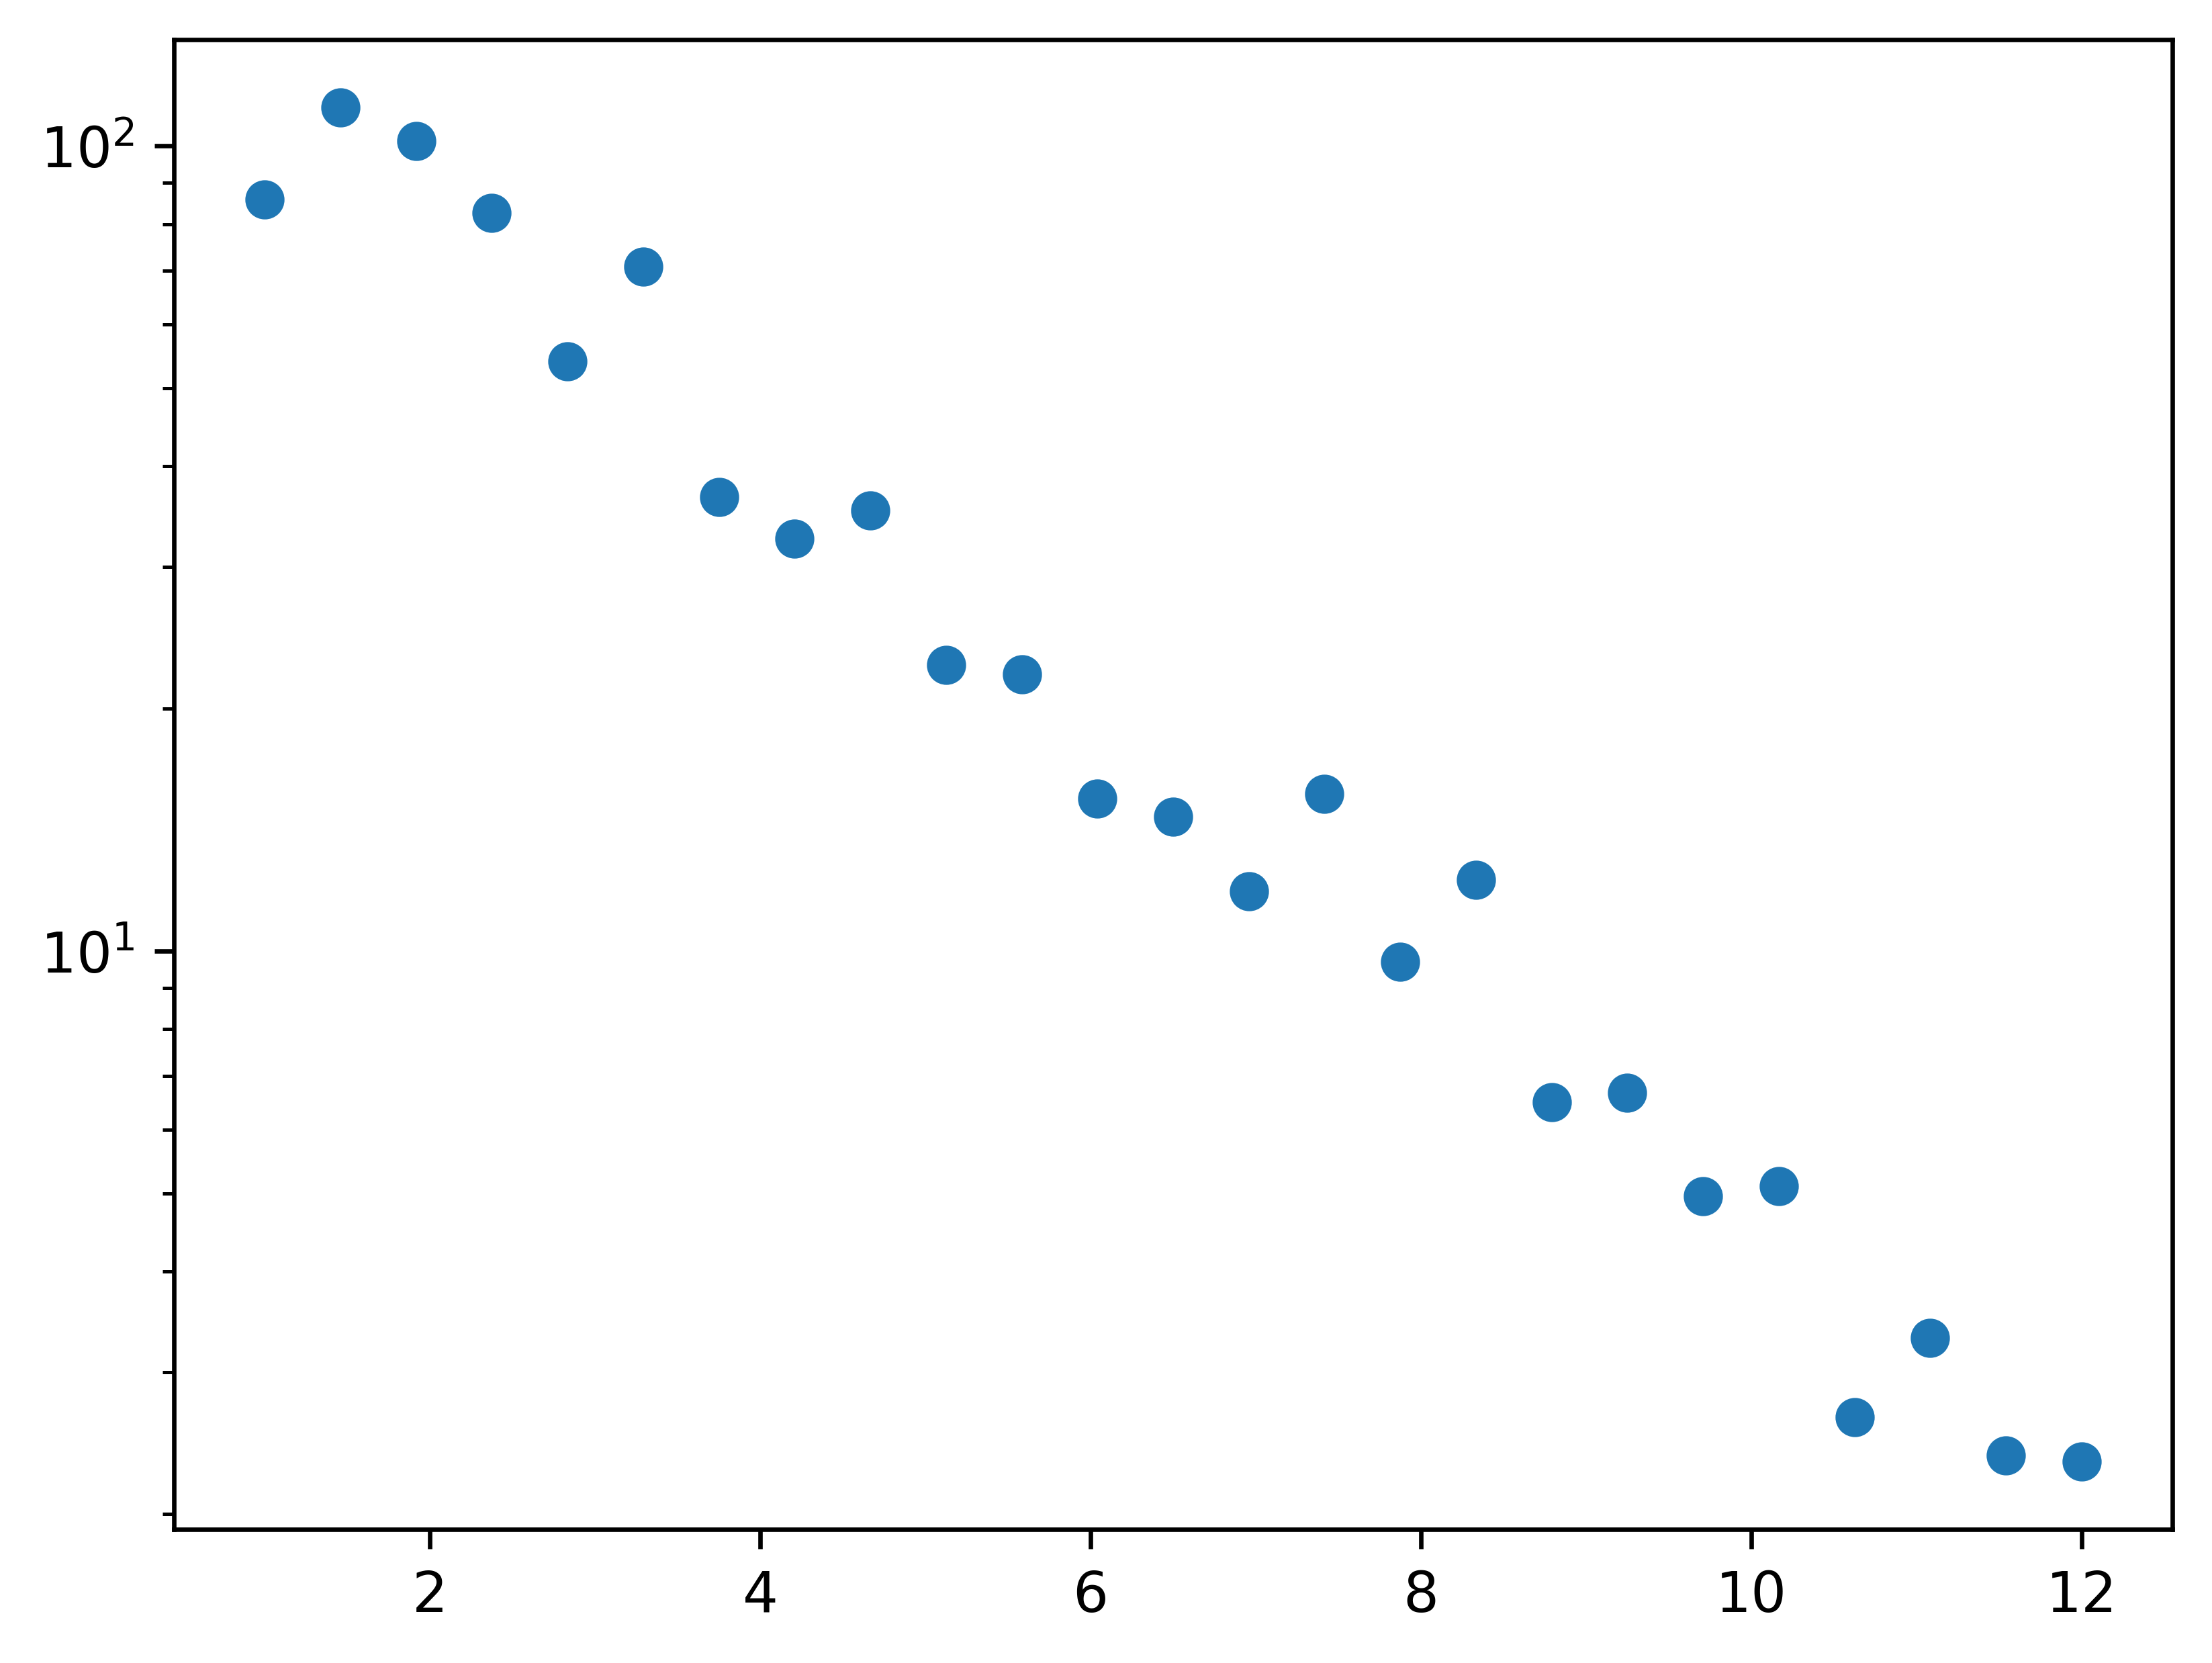

In [3]:
fig, ax = plt.subplots()
ax.scatter(test_data["hours"], test_data["cps"])
ax.set_yscale("log")
plt.show()

In [4]:
model_vals = ordinary_least_squares(test_data, "np.log(cps) ~ hours")

In [5]:
classself = OrdinaryLeastSquares(*model_vals)

In [7]:
self = classself

In [8]:

endog_name = self.model.endog_names

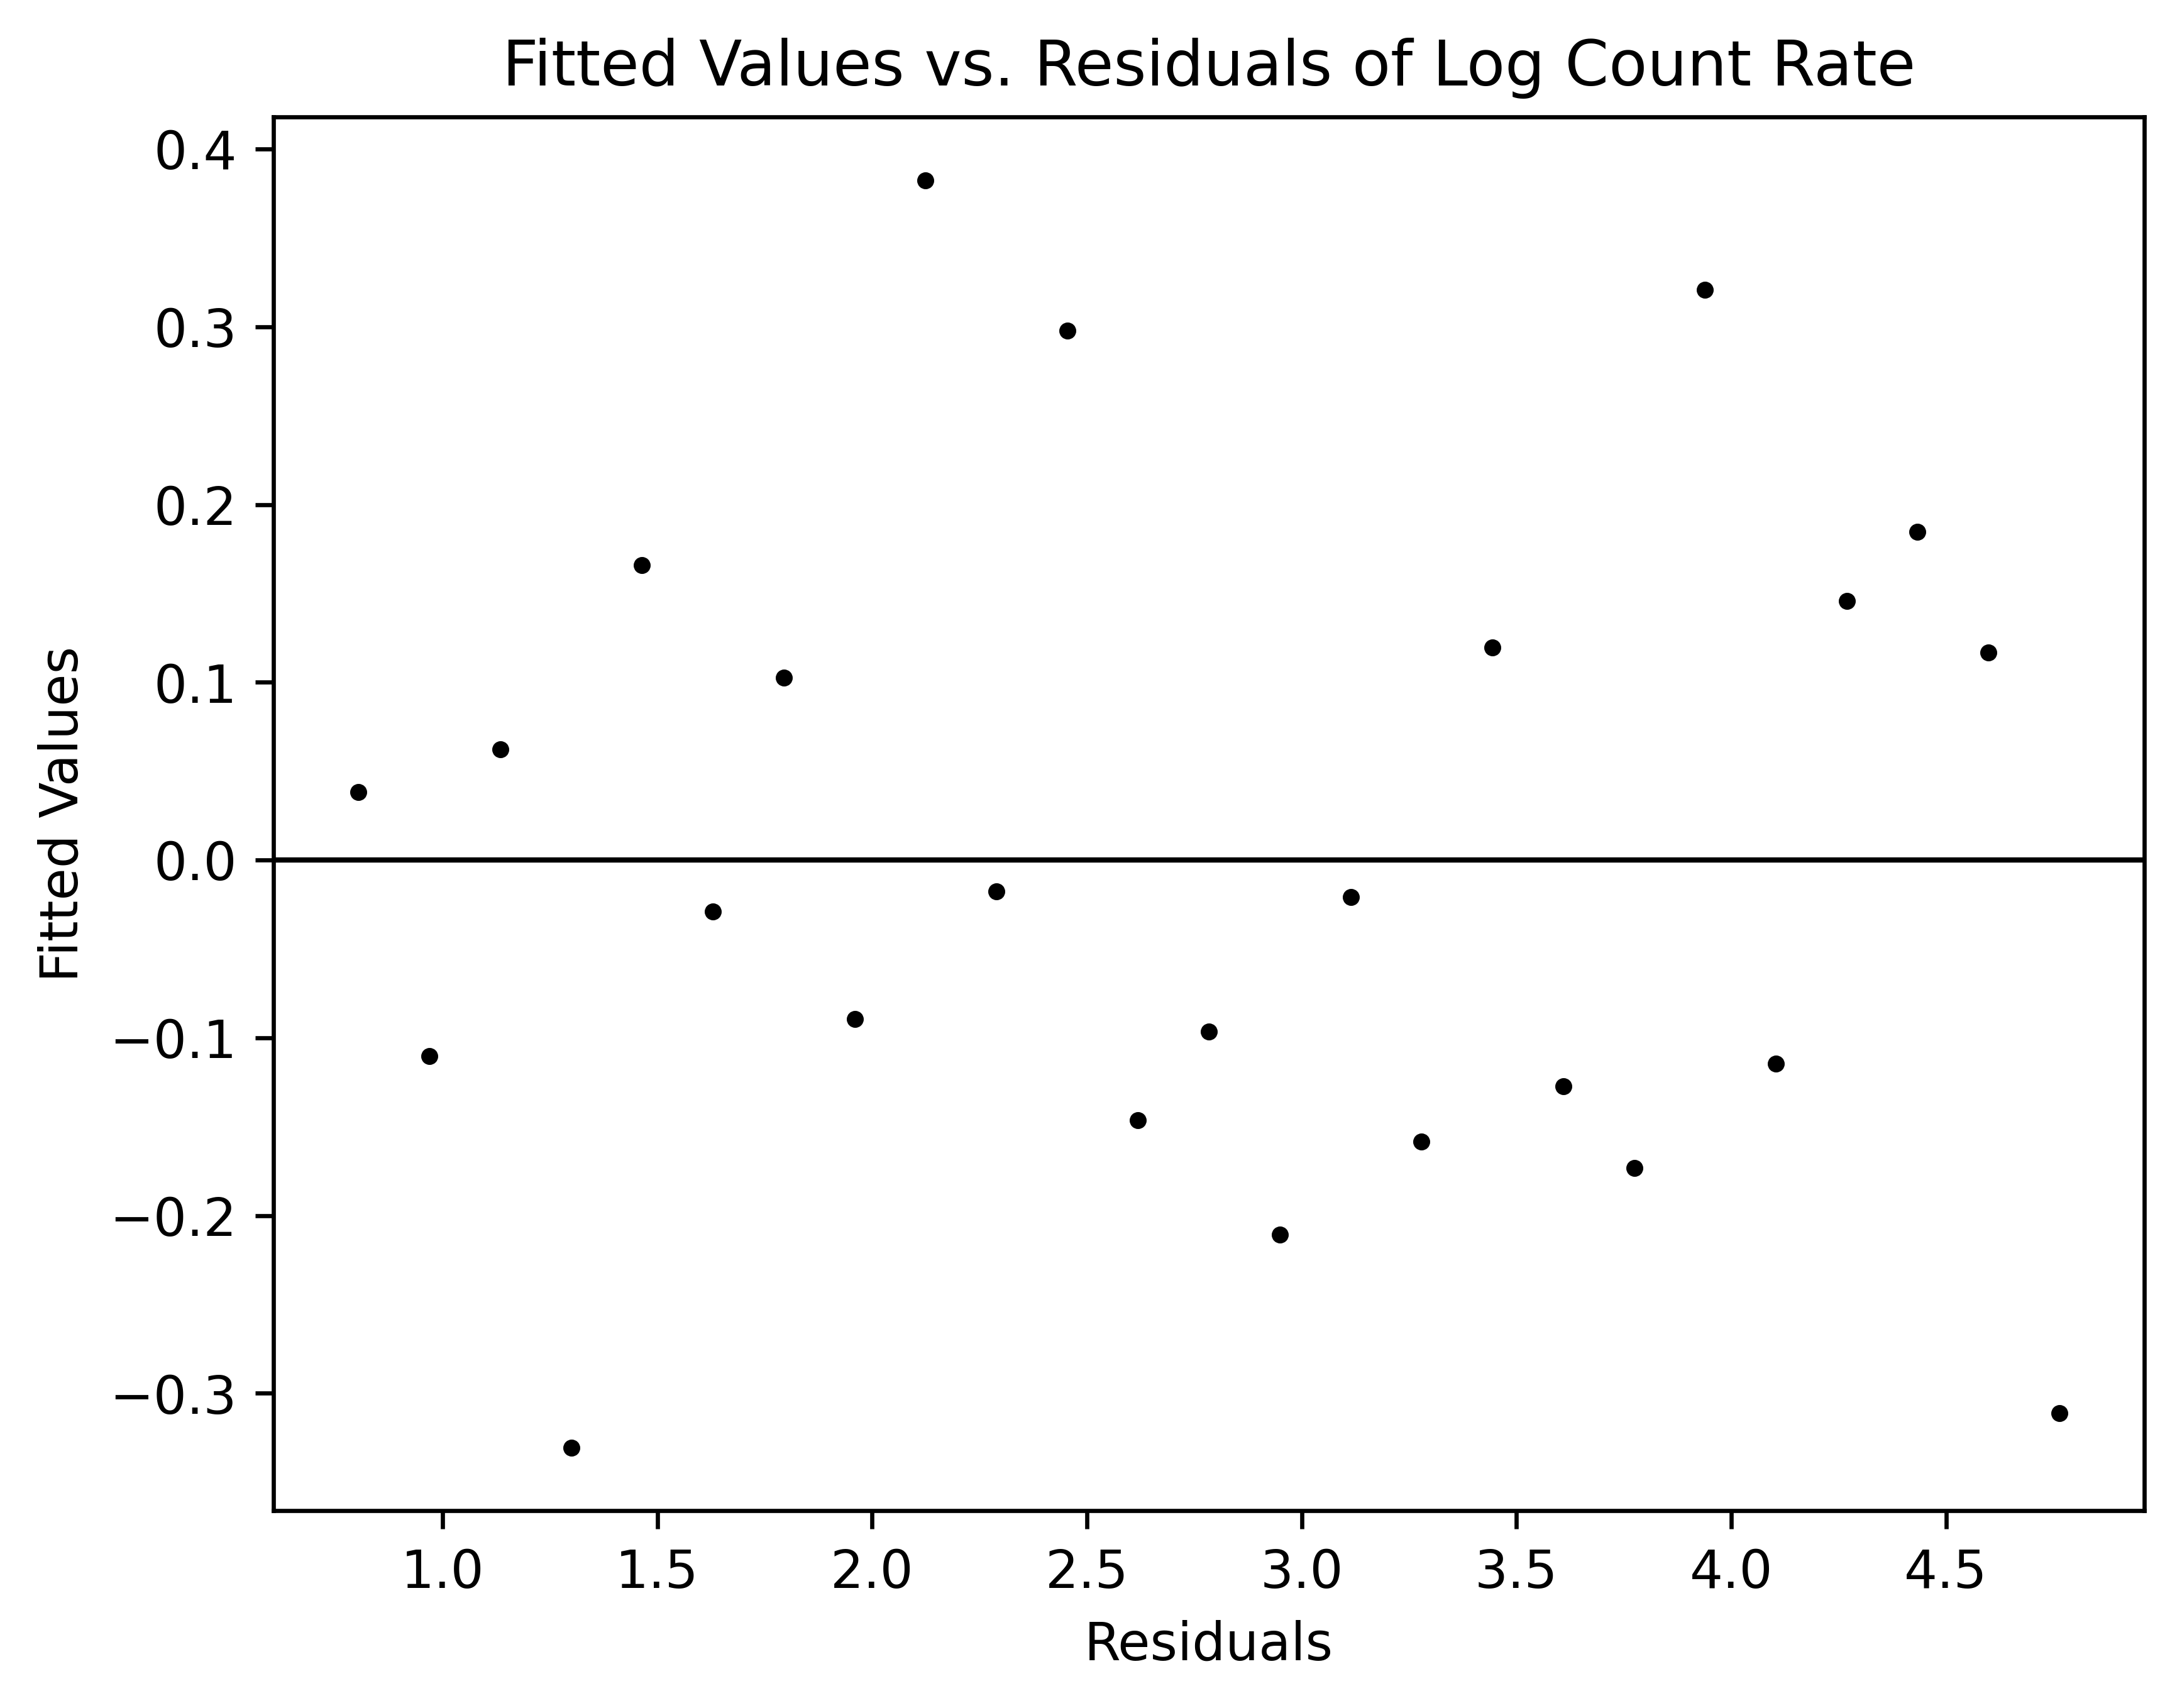

In [7]:
classself.plot_resid_fit(title_name="Log Count Rate")

In [37]:
data = self.data
endog_name = self.model.endog_names

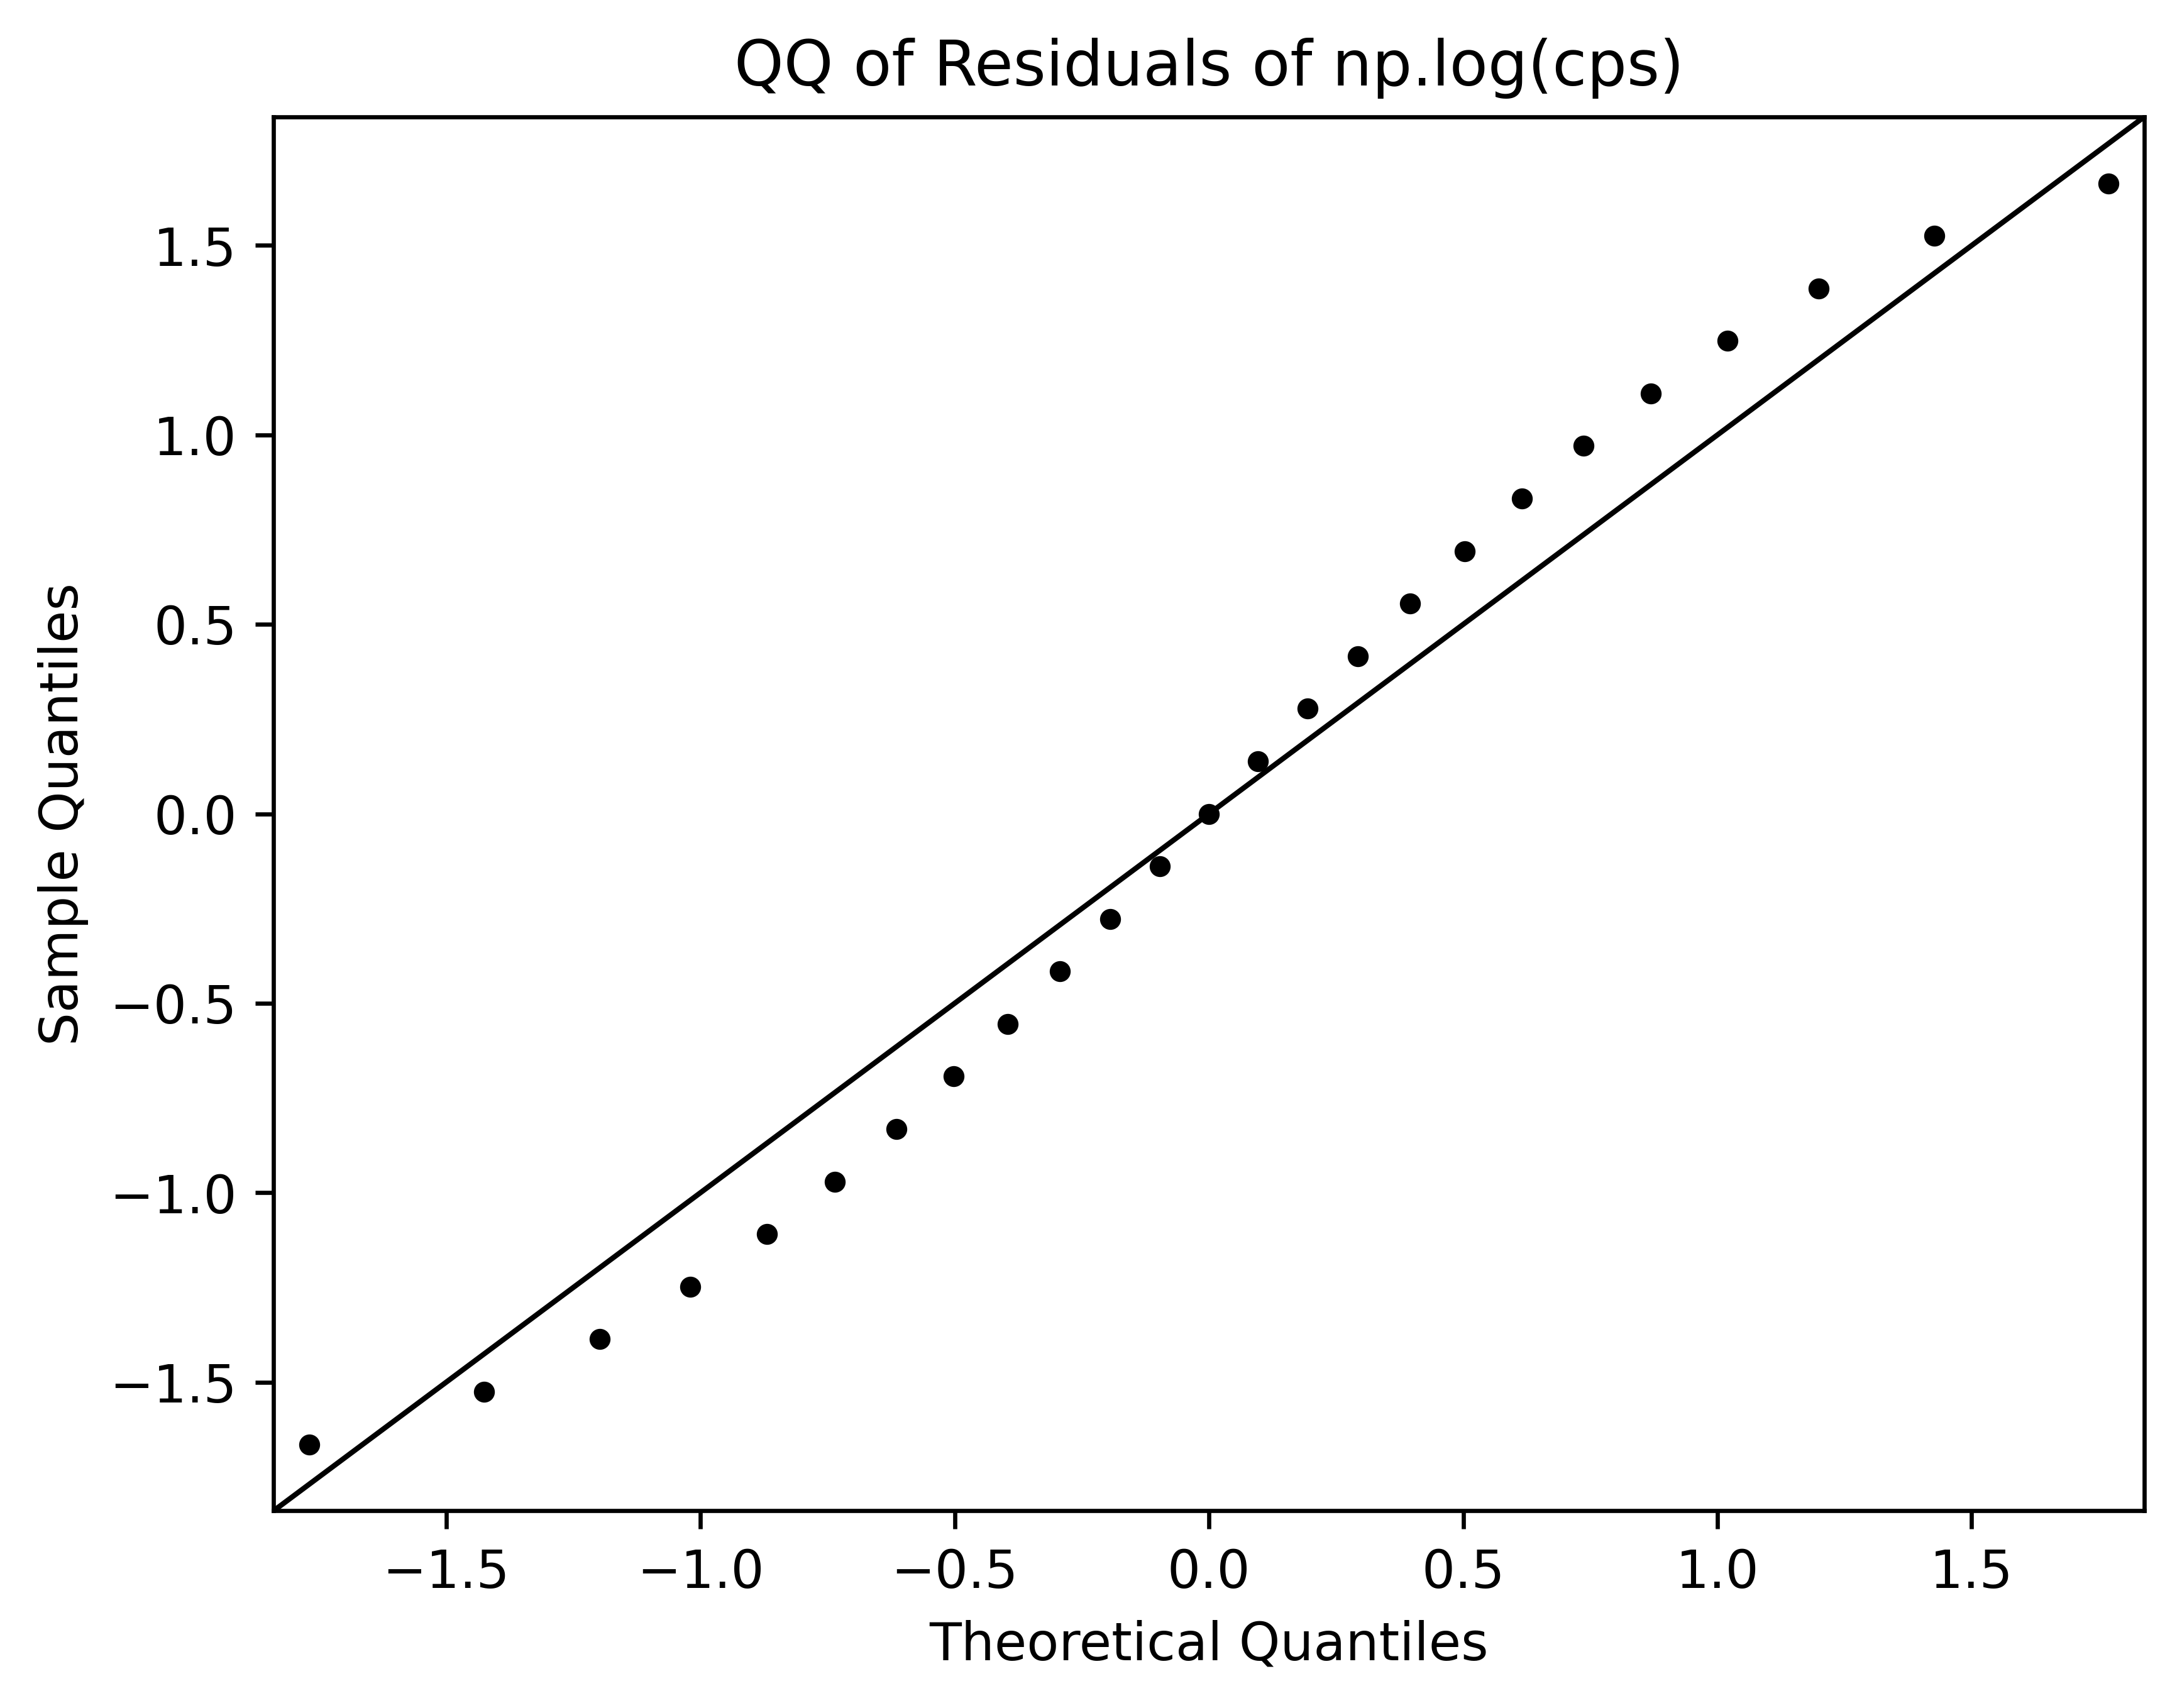

In [60]:
from statsmodels.api import ProbPlot, qqline

fig, ax = plt.subplots()
ax.set_title(f"QQ of Residuals of {self.__endog_name}")

pp = ProbPlot(self.data[f"resid_{self.__endog_name}"], fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='k', markeredgecolor='k', alpha=1, ax=ax)
qqline(qq.axes[0], line='45', fmt='k', lw=1)

plt.savefig(fname="test.svg")
plt.show()

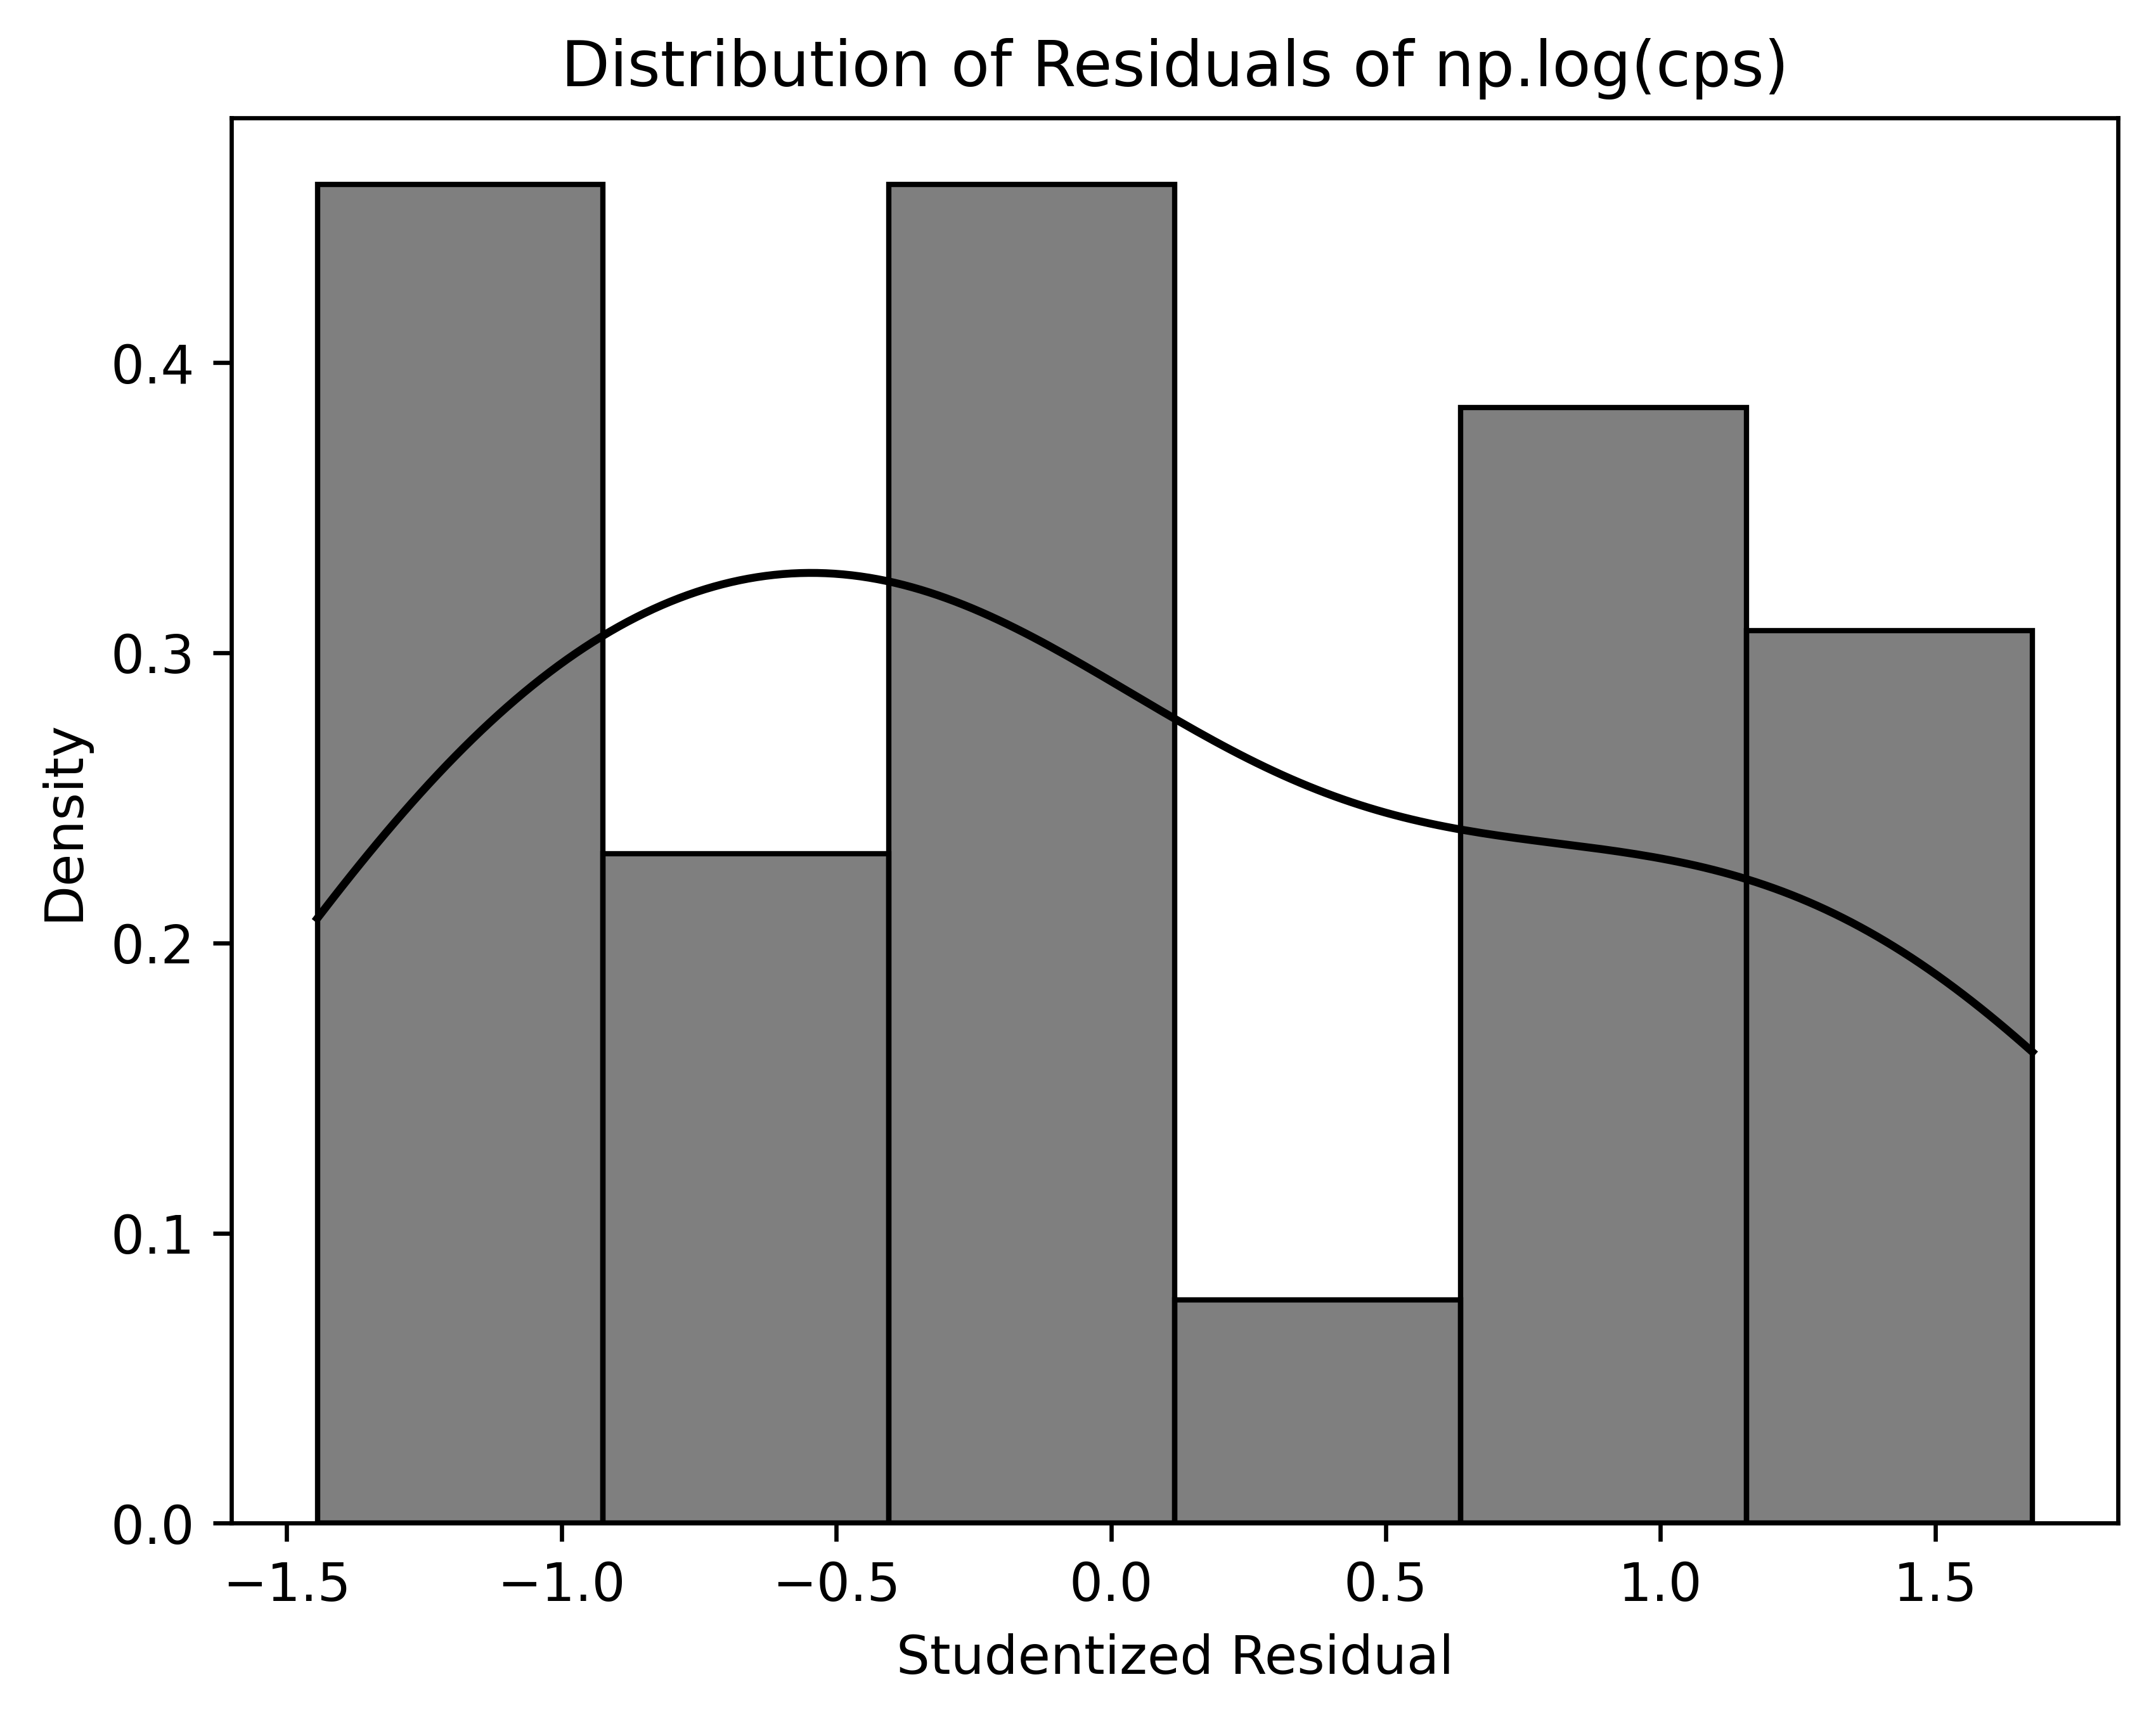

In [88]:
from seaborn import histplot
endog_name = self.model.endog_names
fig, ax = plt.subplots()
histplot(self.data,
         x=f"resid_std_{endog_name}",
         stat="density",
         kde=True,
         color="k",
         ax=ax)
ax.set_xlabel("Studentized Residual")
ax.set_title(f"Distribution of Residuals of {self.__endog_name}")

plt.show()

In [68]:
#fig, ax = plt.subplots()
exog = self.model.exog
exog_names = self.model.exog_names
endog = self.model.endog
endog_name = self.model.endog_names

pd.DataFrame(exog,
             columns=exog_names
             ).assign(**{endog_name:endog,
                         f"fit_{endog_name}":self.data[f"fit_{endog_name}"]})


,Intercept,hours,np.log(cps),fit_np.log(cps)
0,1.0,1.000000,4.646206,-0.152139
1,1.0,1.458333,4.581116,-0.053600
2,1.0,1.916667,4.248383,-0.222705
3,1.0,2.375000,4.243439,-0.064020
4,1.0,2.833333,4.422538,0.278707
5,1.0,3.291667,4.158232,0.178029
6,1.0,3.750000,3.726962,-0.089612
7,1.0,4.208333,3.627050,-0.025896
8,1.0,4.666667,3.606558,0.117241
9,1.0,5.125000,3.099635,-0.226054


In [70]:
[name for name in exog_names if name != "Intercept"]

['hours']